# Connecticut Real Estate 2011-2021
### Aaron 'Asa' Sherwyn
# 06 K-means Clustering Analysis
1. Imports and Set-up
1. Pre-processing
1. Elbow Technique
1. K-means Clustering
1. K-means Analyses
1. Grouped Summary Statistics
1. Conclusion
1. Exports

## 1. Imports and Set-up

In [1]:
#loading libraries

import pandas as pd
import numpy as np
import seaborn as sns
#import matplotlib
import matplotlib.pyplot as plt
import os
#import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
#Creating a path to the root directory for this project

path = r'C:\Users\theva\OneDrive\CareerFoundry\Data Immersion\A6\Connecticut Real Estate 2001-2020'

In [3]:
#Importing main dataframe

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'CTRE 2011-2021 RES ONLY.pkl'))

In [4]:
#Increasing display limit

pd.set_option('display.max_rows', 200)

In [5]:
#Ensuring graphs are displayed within the notebook without "call"ing first

%matplotlib inline

### Checking dataframe

In [6]:
#Checking df

df.head(20)

,serial_number,list_year,town,assessed_value,sale_amount,sales_ratio,residential_type,in_pandemic,month,year,...,street_suffix,population,latitude,longitude,price_index,norm_assessed_value,norm_sale_amount,norm_sales_ratio,sale_category,ratio_category
1,20002,2020,Ashford,253000,430000.0,0.588300,Single Family,1,10,2020,...,ROAD,4193,41.8731,-72.1216,254.076,99576.50,169240.70,0.588372,Low range,Average ratio
2,200212,2020,Avon,130400,179900.0,0.724800,Condo,1,3,2021,...,DRIVE,18821,41.8096,-72.8305,258.935,50360.13,69476.90,0.724847,Low range,Average ratio
3,200243,2020,Avon,619290,890000.0,0.695800,Single Family,1,4,2021,...,DRIVE,18821,41.8096,-72.8305,261.237,237060.60,340686.81,0.695831,Mid range,Average ratio
4,200377,2020,Avon,862330,1447500.0,0.595700,Single Family,1,7,2021,...,DRIVE,18821,41.8096,-72.8305,267.789,322018.45,540537.51,0.595737,Mid range,Average ratio
5,200109,2020,Avon,847520,1250000.0,0.678000,Single Family,1,12,2020,...,DRIVE,18821,41.8096,-72.8305,254.081,333562.92,491969.10,0.678016,Mid range,Average ratio
6,2020313,2020,Berlin,412000,677500.0,0.608100,Single Family,1,7,2021,...,ROAD,20107,41.6215,-72.7457,267.789,153852.47,252997.70,0.608118,Mid range,Average ratio
8,20139,2020,Bethel,171360,335000.0,0.511500,Single Family,1,12,2020,...,DRIVE,20287,41.3712,-73.4140,254.081,67443.06,131847.72,0.511522,Low range,Average ratio
9,200086,2020,Bethlehem,168900,352000.0,0.479800,Single Family,1,8,2021,...,ROAD,3408,41.6404,-73.2058,268.387,62931.51,131153.89,0.479830,Low range,Low ratio
10,2000381,2020,Bloomfield,163730,250000.0,0.654900,Condo,1,9,2021,...,RIDGE,21399,41.8265,-72.7301,269.086,60846.72,92907.10,0.654920,Low range,Average ratio
11,200258,2020,Branford,530500,700000.0,0.757800,Single Family,1,1,2021,...,NaN,28230,41.2799,-72.8141,255.296,207798.01,274191.53,0.757857,Mid range,Average ratio


In [7]:
#Checking df

df.tail(20)

,serial_number,list_year,town,assessed_value,sale_amount,sales_ratio,residential_type,in_pandemic,month,year,...,street_suffix,population,latitude,longitude,price_index,norm_assessed_value,norm_sale_amount,norm_sales_ratio,sale_category,ratio_category
435159,100012,2010,Woodbridge,284900,415000.0,0.686506,Single Family,0,10,2010,...,ROAD,9073,41.3526,-73.0084,214.623,132744.39,193362.31,0.686506,Low range,Average ratio
435160,10155,2010,Milford,269100,310000.0,0.868065,Condo,0,12,2010,...,ROAD,52308,41.2307,-73.0640,215.262,125010.45,144010.55,0.868065,Low range,High ratio
435161,100027,2010,Branford,111100,139000.0,0.799281,Condo,0,11,2010,...,NaN,28230,41.2799,-72.8141,214.750,51734.58,64726.43,0.799281,Low range,Average ratio
435162,100117,2010,Newington,65310,97000.0,0.673299,Condo,0,10,2010,...,DRIVE,30493,41.6973,-72.7228,214.623,30430.10,45195.53,0.673299,Low range,Average ratio
435163,10146,2010,Bloomfield,358470,560000.0,0.640125,Single Family,0,6,2011,...,LANE,21399,41.8265,-72.7301,222.522,161094.18,251660.51,0.640125,Mid range,Average ratio
435164,10212,2010,Hamden,181160,207500.0,0.873060,Single Family,0,3,2011,...,CIRCLE,61160,41.3839,-72.9026,220.024,82336.47,94307.89,0.873060,Low range,High ratio
435165,10055,2010,North Haven,168980,190000.0,0.889368,Single Family,0,12,2010,...,ROAD,24217,41.3903,-72.8595,215.262,78499.69,88264.53,0.889368,Low range,High ratio
435166,100846,2010,Stamford,738830,687500.0,1.074662,Single Family,0,6,2011,...,ROAD,134820,41.0534,-73.5387,222.522,332025.60,308958.22,1.074662,Mid range,High ratio
435167,10088,2010,Groton,114240,128000.0,0.892500,Single Family,0,12,2010,...,COURT,38686,41.3497,-72.0791,215.262,53070.21,59462.42,0.892500,Low range,High ratio
435168,10076,2010,Brookfield,349480,439000.0,0.796082,Single Family,0,3,2011,...,ROAD,17428,41.4826,-73.4096,220.024,158837.22,199523.69,0.796082,Low range,Average ratio


In [8]:
#Checking df

df.shape

(430492, 21)

Check!

## 2. Pre-processing

In [9]:
#creating a data frame with variables relevant to clustering

df_reduced = df[['month', 'year', 'population', 'norm_assessed_value', 'norm_sale_amount', 'norm_sales_ratio']]

In [10]:
#Checking shape

df_reduced.shape

(430492, 6)

In [11]:
#pre-standardization summary statistics

df_reduced.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,month,year,population,norm_assessed_value,norm_sale_amount,norm_sales_ratio
count,430492.00,430492.00,430492.00,430492.00,430492.00,430492.00
mean,6.89,2016.54,44969.08,102595.03,152681.17,0.71
std,3.19,3.12,37587.44,150502.42,229721.57,0.20
min,1.00,2010.00,932.00,232.97,799.25,0.05
25%,4.00,2014.00,18354.00,46752.96,67438.03,0.59
50%,7.00,2017.00,30002.00,68110.34,101487.40,0.68
75%,9.00,2019.00,60790.00,105651.68,158326.00,0.80
max,12.00,2021.00,148529.00,10599245.58,19494919.14,1.41


In [12]:
#standardizing df_reduced

df_reduced['month'] = (df_reduced['month'] - df_reduced['month'].mean()) / df_reduced['month'].std()
df_reduced['year'] = (df_reduced['year'] - df_reduced['year'].mean()) / df_reduced['year'].std()
df_reduced['population'] = (df_reduced['population'] - df_reduced['population'].mean()) / df_reduced['population'].std()
df_reduced['norm_assessed_value'] = (df_reduced['norm_assessed_value'] - df_reduced['norm_assessed_value'].mean()) / df_reduced['norm_assessed_value'].std()
df_reduced['norm_sale_amount'] = (df_reduced['norm_sale_amount'] - df_reduced['norm_sale_amount'].mean()) / df_reduced['norm_sale_amount'].std()
df_reduced['norm_sales_ratio'] = (df_reduced['norm_sales_ratio'] - df_reduced['norm_sales_ratio'].mean()) / df_reduced['norm_sales_ratio'].std()

C:\Users\theva\AppData\Local\Temp\ipykernel_9508\3496636812.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['month'] = (df_reduced['month'] - df_reduced['month'].mean()) / df_reduced['month'].std()
C:\Users\theva\AppData\Local\Temp\ipykernel_9508\3496636812.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['year'] = (df_reduced['year'] - df_reduced['year'].mean()) / df_reduced['year'].std()
C:\Users\theva\AppData\Local\Temp\ipykernel_9508\3496636812.py:6: SettingWithCopyWarning: 

In [13]:
#post-standardization summary statistics

df_reduced.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,month,year,population,norm_assessed_value,norm_sale_amount,norm_sales_ratio
count,430492.00,430492.00,430492.00,430492.00,430492.00,430492.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.84,-2.10,-1.17,-0.68,-0.66,-3.24
25%,-0.90,-0.82,-0.71,-0.37,-0.37,-0.59
50%,0.04,0.15,-0.40,-0.23,-0.22,-0.15
75%,0.66,0.79,0.42,0.02,0.02,0.44
max,1.60,1.43,2.76,69.74,84.20,3.41


## 3. Elbow Technique

In [14]:
#Setting variables

num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
# Creates a score that represents a rate of variation for the given cluster option.

score = [kmeans[i].fit(df_reduced).score(df_reduced) for i in range(len(kmeans))]
score

[-2582946.0000007357,
 -2144087.644399928,
 -1756121.234998824,
 -1510869.6880802026,
 -1348681.4572752453,
 -1205196.9529137155,
 -1083985.7077623573,
 -1006697.1936309915,
 -940109.7665891043]

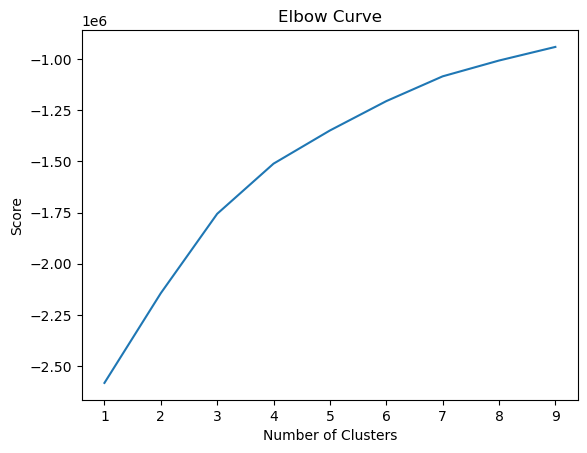

In [16]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.savefig('elbow_curve.png')
pl.show()

>Notes: The sharpest change in slope exists at Number of Clusters = 3, so the analysis will use K = 3.

## 4. K-means Clustering

In [17]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [18]:
# Fit the k-means object to the data.

kmeans.fit(df_reduced)

KMeans(n_clusters=3)

In [19]:
#creating cluster variable in main df

df['clusters'] = kmeans.fit_predict(df_reduced)

In [20]:
#checking new variable

df.head(20)

,serial_number,list_year,town,assessed_value,sale_amount,sales_ratio,residential_type,in_pandemic,month,year,...,population,latitude,longitude,price_index,norm_assessed_value,norm_sale_amount,norm_sales_ratio,sale_category,ratio_category,clusters
1,20002,2020,Ashford,253000,430000.0,0.588300,Single Family,1,10,2020,...,4193,41.8731,-72.1216,254.076,99576.50,169240.70,0.588372,Low range,Average ratio,0
2,200212,2020,Avon,130400,179900.0,0.724800,Condo,1,3,2021,...,18821,41.8096,-72.8305,258.935,50360.13,69476.90,0.724847,Low range,Average ratio,0
3,200243,2020,Avon,619290,890000.0,0.695800,Single Family,1,4,2021,...,18821,41.8096,-72.8305,261.237,237060.60,340686.81,0.695831,Mid range,Average ratio,0
4,200377,2020,Avon,862330,1447500.0,0.595700,Single Family,1,7,2021,...,18821,41.8096,-72.8305,267.789,322018.45,540537.51,0.595737,Mid range,Average ratio,0
5,200109,2020,Avon,847520,1250000.0,0.678000,Single Family,1,12,2020,...,18821,41.8096,-72.8305,254.081,333562.92,491969.10,0.678016,Mid range,Average ratio,0
6,2020313,2020,Berlin,412000,677500.0,0.608100,Single Family,1,7,2021,...,20107,41.6215,-72.7457,267.789,153852.47,252997.70,0.608118,Mid range,Average ratio,0
8,20139,2020,Bethel,171360,335000.0,0.511500,Single Family,1,12,2020,...,20287,41.3712,-73.4140,254.081,67443.06,131847.72,0.511522,Low range,Average ratio,0
9,200086,2020,Bethlehem,168900,352000.0,0.479800,Single Family,1,8,2021,...,3408,41.6404,-73.2058,268.387,62931.51,131153.89,0.479830,Low range,Low ratio,0
10,2000381,2020,Bloomfield,163730,250000.0,0.654900,Condo,1,9,2021,...,21399,41.8265,-72.7301,269.086,60846.72,92907.10,0.654920,Low range,Average ratio,0
11,200258,2020,Branford,530500,700000.0,0.757800,Single Family,1,1,2021,...,28230,41.2799,-72.8141,255.296,207798.01,274191.53,0.757857,Mid range,Average ratio,0


In [21]:
#Checking cluster frequencies

df['clusters'].value_counts()

0    234618
2    186881
1      8993
Name: clusters, dtype: int64

## 5. K-means Analyses

### X vs sale amount

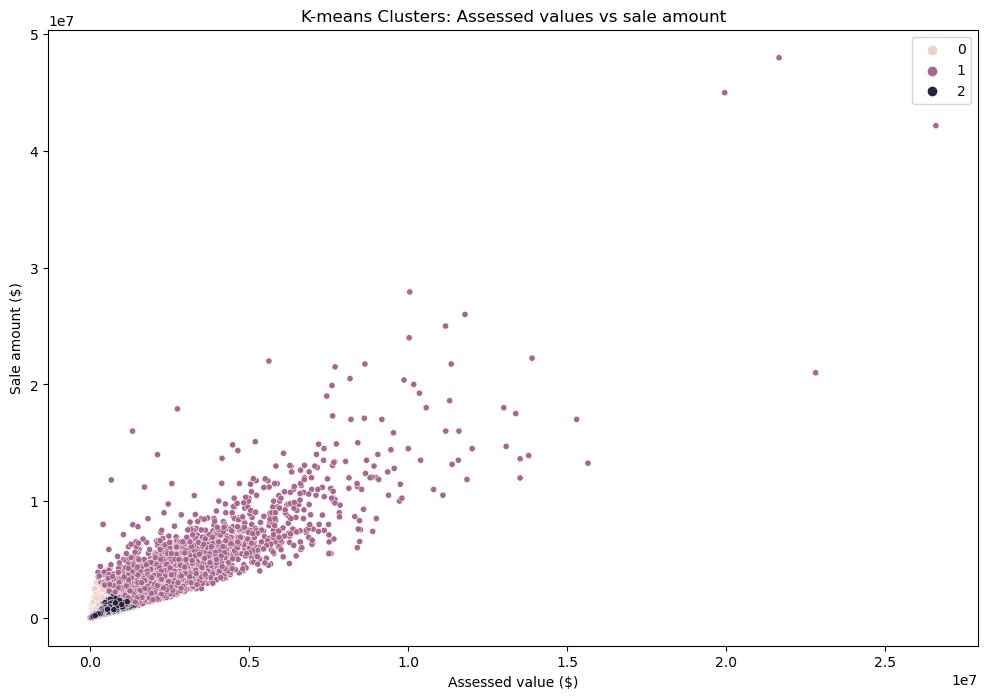

In [26]:
# Plot the clusters for assessed_value and sale_amount

x=df['assessed_value']
y=df['sale_amount']

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=x, y=y, hue=kmeans.labels_, s=20)

ax.grid(False) 
plt.title('K-means Clusters: Assessed values vs sale amount')
plt.xlabel('Assessed value ($)') 
plt.ylabel('Sale amount ($)')
plt.savefig('k_means_1.png')
plt.show()

>Notes: this plot shows three clear groupings related to sale amount and assessed value. <br><br>
Cluster 0: smaller values staying below the trend line.<br>
Cluster 1: smaller values staying above the trend line.<br>
Cluster 2: larger values above and below the trend line.<br><br>
Look into: average sale amount and average assessed value per cluster.

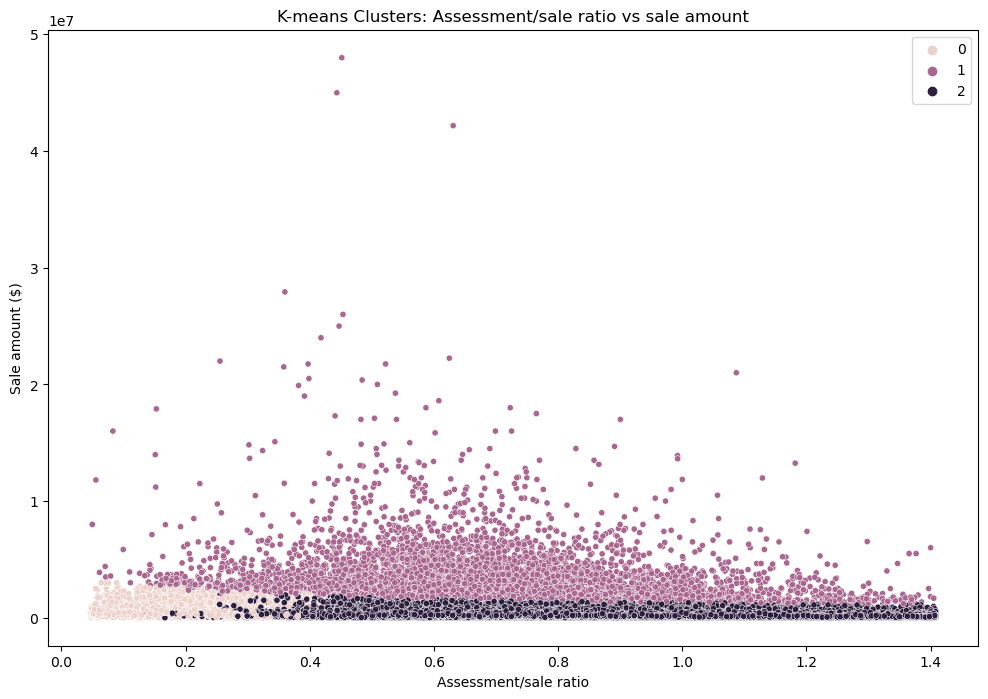

In [27]:
# Plot the clusters for the sales_ratio and sale_amount

x=df['sales_ratio']
y=df['sale_amount']

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=x, y=y, hue=kmeans.labels_, s=20)

ax.grid(False) 
plt.title('K-means Clusters: Assessment/sale ratio vs sale amount')
plt.xlabel('Assessment/sale ratio') 
plt.ylabel('Sale amount ($)') 
plt.savefig('k_means_2.png')
plt.show()

>Notes: this plot shows three clear groupings related to sale amount and assessment/sale ratio. <br><br>
Cluster 0: smaller sale amounts with ratios above 0.25.<br>
Cluster 1: smaller sale amounts with ratios below 0.25.<br>
Cluster 2: larger sale amounts of allratios.<br><br>
Look into: average ratio per cluster.

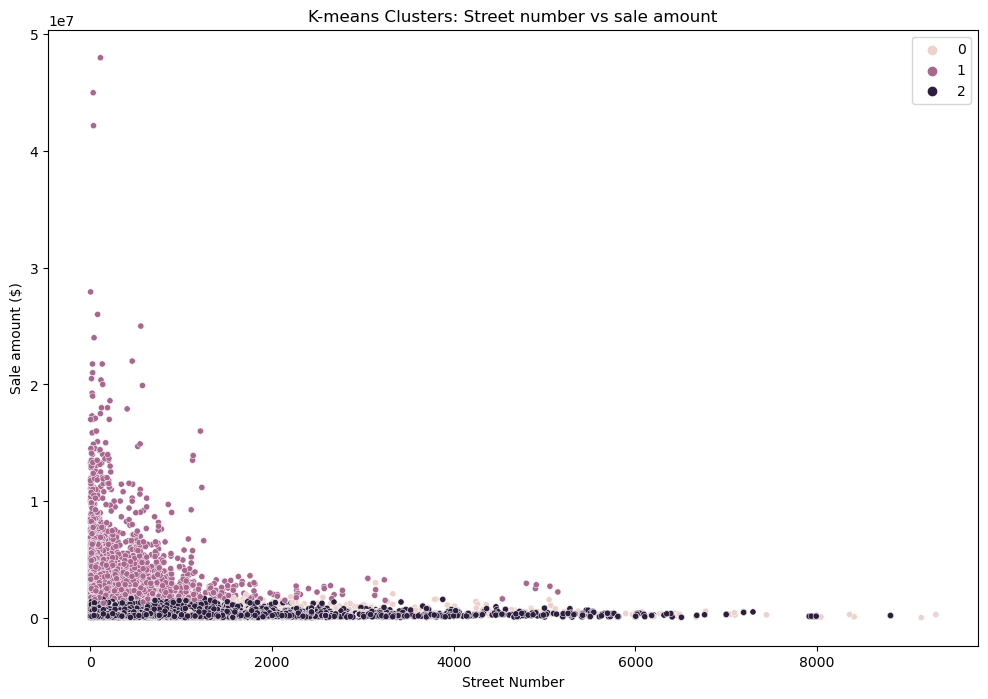

In [28]:
# Plot the clusters for the street_number and sale_amount

x=df['street_number']
y=df['sale_amount']

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=x, y=y, hue=kmeans.labels_, s=20)

ax.grid(False) 
plt.title('K-means Clusters: Street number vs sale amount')
plt.xlabel('Street Number') 
plt.ylabel('Sale amount ($)') 
plt.savefig('k_means_3.png')
plt.show()

>Notes: this plot shows a distinction in street numbers for clusters 0 and 2.<br><br>
Cluster 0: begins to distinctly taper off around street number 6000.<br>
Cluster 2: begins to distinctly taper off around street number 1000.<br><br>
Look into: average street number per cluster.

### X vs sales ratio

C:\Users\theva\AppData\Local\Temp\ipykernel_9508\14746837.py:12: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('k_means_4.png')
C:\Users\theva\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


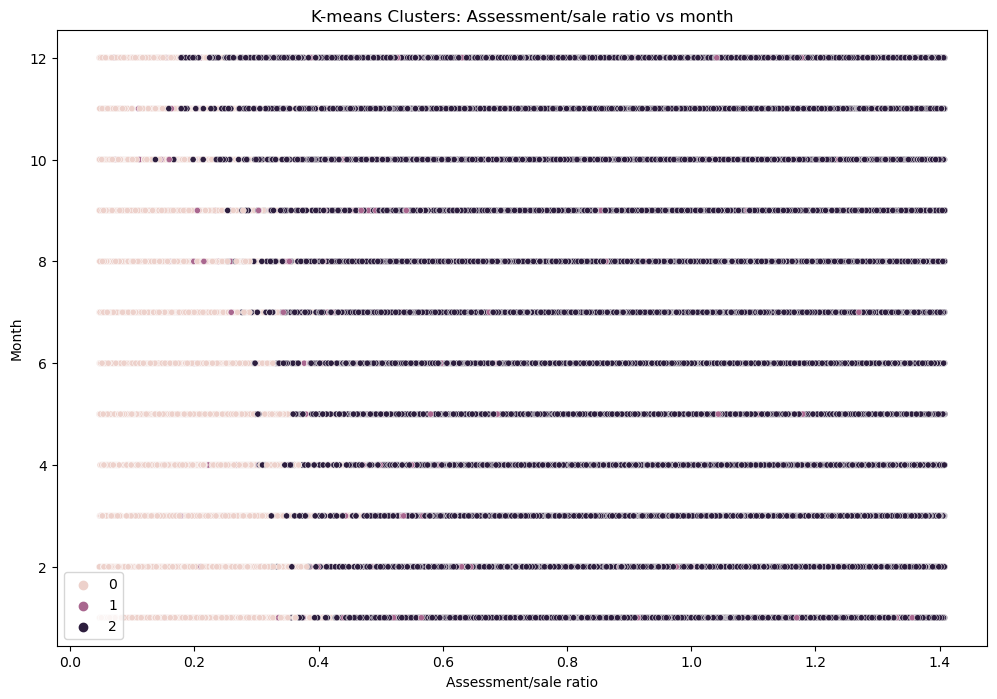

In [29]:
# Plot the clusters for the sales_ratio and month.
x=df['sales_ratio']
y=df['month']

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=x, y=y, hue=kmeans.labels_, s=20)

ax.grid(False) 
plt.title('K-means Clusters: Assessment/sale ratio vs month')
plt.xlabel('Assessment/sale ratio') 
plt.ylabel('Month') 
plt.savefig('k_means_4.png')
plt.show()

>Notes: this plot shows an unusual relationship for assessment/sale ratio per month for clusters 0 and 1<br><br>
Cluster 0: As month increases, assessment/sale ratio decreases.<br>
Cluster 1: As month increases, assessment/sale ratio decreases.<br><br>
Look into: average month per cluster, average ratio per month per cluster, count per cluster per month.

C:\Users\theva\AppData\Local\Temp\ipykernel_9508\254365271.py:12: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('k_means_5.png')
C:\Users\theva\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


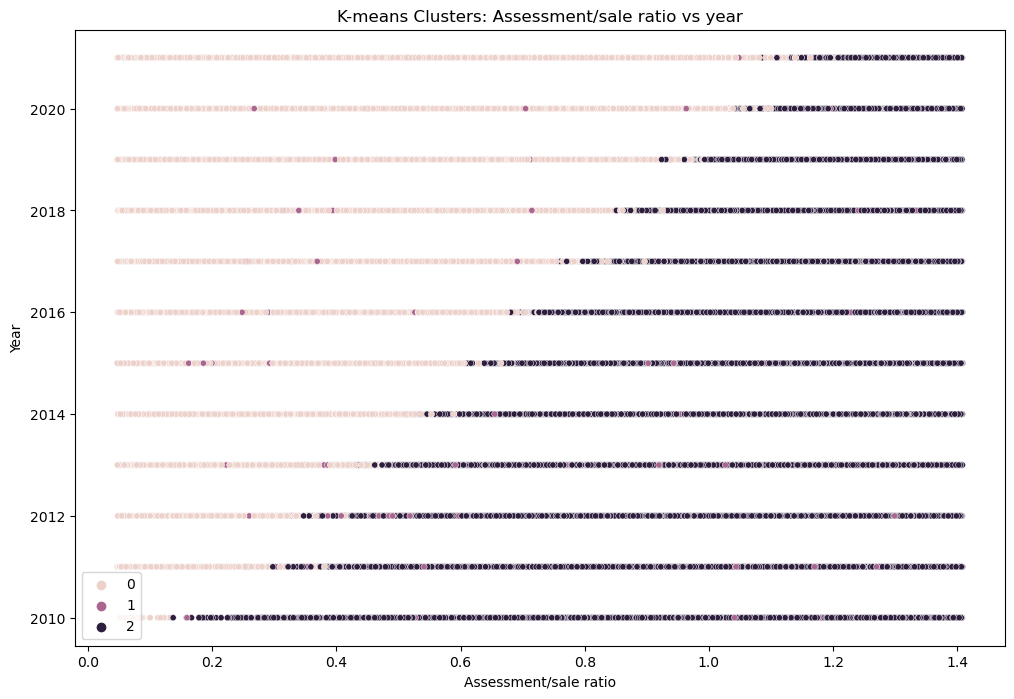

In [30]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.
x=df['sales_ratio']
y=df['year']

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=x, y=y, hue=kmeans.labels_, s=20)

ax.grid(False) 
plt.title('K-means Clusters: Assessment/sale ratio vs year')
plt.xlabel('Assessment/sale ratio') 
plt.ylabel('Year') 
plt.savefig('k_means_5.png')
plt.show()

>Notes: this plot shows an unusual relationship for assessment/sale ratio per year for clusters 0 and 1<br><br>
Cluster 0: As year increases, assessment/sale ratio increases.<br>
Cluster 1: As year increases, assessment/sale ratio increases.<br><br>
Look into: average year per cluster, average ratio per year per cluster, count per year per cluster.

C:\Users\theva\AppData\Local\Temp\ipykernel_9508\1128817448.py:12: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('k_means_6.png')
C:\Users\theva\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


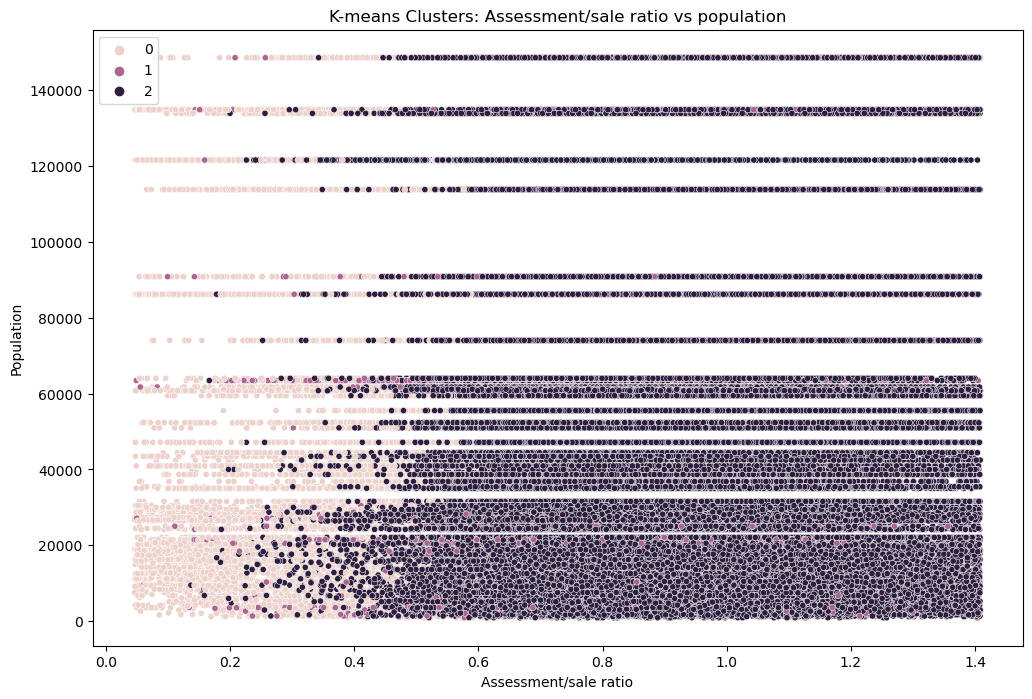

In [31]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.
x=df['sales_ratio']
y=df['population']

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=x, y=y, hue=kmeans.labels_, s=20)

ax.grid(False) 
plt.title('K-means Clusters: Assessment/sale ratio vs population')
plt.xlabel('Assessment/sale ratio') 
plt.ylabel('Population') 
plt.savefig('k_means_6.png')
plt.show()

>Notes: this plot shows a slight preference of cluster 2 for smaller populatins<br><br>
Look into: average population per cluster.

## 6. Grouped Summary Statistics

In [32]:
# Cluster summary statistics

df.groupby('clusters').agg({
    'sale_amount':['mean', 'median'],
    'assessed_value':['mean', 'median'], 
    'sales_ratio':['mean', 'median'],
    'street_number':['mean', 'median'],
    'month':['mean', 'median'],
    'year':['mean', 'median'],
    'population':['mean', 'median']
    }).apply(lambda s: s.apply('{0:.2f}'.format))

sale_amount             assessed_value             sales_ratio  \
                mean      median           mean      median        mean   
clusters                                                                  
0          339770.38   265000.00      201890.85   156170.00        0.61   
1         3044360.74  2475000.00     2024998.29  1635620.00        0.69   
2          273675.45   209000.00      215798.22   165700.00        0.84   

                street_number        month            year           \
         median          mean median  mean median     mean   median   
clusters                                                              
0          0.61        176.91  60.00  6.58   7.00  2018.64  2019.00   
1          0.68        137.66  41.00  6.84   7.00  2016.30  2017.00   
2          0.79        178.20  60.00  7.27   7.00  2013.92  2014.00   

         population            
               mean    median  
clusters                       
0          47692.40  35061.00  
1          44774.95  61737.00  
2          41559.45  28230.00

#### Clusters 0 and 1 are on the smaller end of the sales spectrum (averaging less than \\$340,000) and Cluster 2 is on the higher end (averaging greater than \\$2,500,000).
***
##### Clusters 0 vs Cluster 1 on average:
- Cluster 0 has a smaller sale amount, larger assessed value, and larger sales ratio.
- Cluster 0 has a (slightly) larger mean month, smaller year, and smaller population.
- Cluster 1 has a larger sale amount, smaller assessed value, and smaller sales ratio.
- Cluster 1 has a (slightly) smaller mean month, larger year, and larger population.
- Cluster 0 and 1 have approximately the same street number and month.
***
##### Cluster 2 on average:
- Has the largest sale amount, assessed value, and median (but not mean) population.
- Has the middle sales ratio, month, and year.
- Has the smallest street number.

In [33]:
# Cluster summary statistics per month

df.groupby(['clusters', 'month']).agg({
    'sales_ratio':['mean', 'median'],
    'population':['count']
    }).apply(lambda s: s.apply('{0:.2f}'.format))

sales_ratio        population
                      mean median      count
clusters month                              
0        1            0.64   0.64   16020.00
         2            0.63   0.63   13557.00
         3            0.62   0.63   16896.00
         4            0.61   0.62   18484.00
         5            0.61   0.62   21537.00
         6            0.60   0.61   25832.00
         7            0.59   0.60   26753.00
         8            0.59   0.60   26311.00
         9            0.59   0.59   21807.00
         10           0.61   0.61   17400.00
         11           0.60   0.61   14900.00
         12           0.60   0.61   15121.00
1        1            0.71   0.70     519.00
         2            0.71   0.69     438.00
         3            0.69   0.69     526.00
         4            0.69   0.67     634.00
         5            0.70   0.69     853.00
         6            0.68   0.67    1121.00
         7            0.67   0.66    1084.00
         8            0.68   0.67    1071.00
         9            0.69   0.68     724.00
         10           0.68   0.67     651.00
         11           0.70   0.69     610.00
         12           0.72   0.70     762.00
2        1            0.90   0.86    9277.00
         2            0.90   0.86    8449.00
         3            0.89   0.85   11322.00
         4            0.87   0.83   12501.00
         5            0.85   0.81   15473.00
         6            0.83   0.78   18462.00
         7            0.82   0.77   18869.00
         8            0.83   0.78   18927.00
         9            0.84   0.79   16338.00
         10           0.82   0.77   19668.00
         11           0.82   0.78   17896.00
         12           0.82   0.78   19699.00

##### Cluster 0:
- monthly sales ratio decreases from January to December.
- monthly counts (generally) increase from January to December.

##### Cluster 1 and 2:
- monthly sales ratio decreases January to July and increases August to December.
- monthly counts increase January to July and decrease August to December.

In [34]:
# Cluster summary statistics per year

df.groupby(['clusters', 'year']).agg({
    'sales_ratio':['mean', 'median'],
    'population':['count']
    }).apply(lambda s: s.apply('{0:.2f}'.format))

sales_ratio        population
                     mean median      count
clusters year                              
0        2010        0.10   0.09      22.00
         2011        0.21   0.22     446.00
         2012        0.24   0.25     476.00
         2013        0.31   0.31    1177.00
         2014        0.44   0.48    3243.00
         2015        0.53   0.57    9278.00
         2016        0.60   0.62   19402.00
         2017        0.63   0.64   30074.00
         2018        0.64   0.65   34189.00
         2019        0.64   0.64   41923.00
         2020        0.62   0.61   53036.00
         2021        0.55   0.54   41352.00
1        2010        0.80   0.79      91.00
         2011        0.76   0.76     486.00
         2012        0.72   0.71     880.00
         2013        0.68   0.67     883.00
         2014        0.65   0.64     759.00
         2015        0.64   0.64     887.00
         2016        0.68   0.66     486.00
         2017        0.71   0.70     934.00
         2018        0.72   0.71     766.00
         2019        0.74   0.73     550.00
         2020        0.71   0.69    1265.00
         2021        0.63   0.61    1006.00
2        2010        0.82   0.79    6446.00
         2011        0.84   0.81   23765.00
         2012        0.84   0.81   24076.00
         2013        0.79   0.75   28850.00
         2014        0.78   0.73   30414.00
         2015        0.81   0.75   30541.00
         2016        0.86   0.80   20334.00
         2017        0.96   0.92   10740.00
         2018        1.04   1.01    5874.00
         2019        1.11   1.09    3656.00
         2020        1.18   1.17    1715.00
         2021        1.26   1.26     470.00

##### Cluster 0:
- yearly sales ratio (generally) increase from 2010 to 2021.
- yearly counts peak in 2014/2015 and steadily plummit. 2021 is 1.5% of 2015.

##### Cluster 1:
- yearly sales ratio steadily increase until 2019, then begin to decrease.
- yearly counts increase until 2020, then slightly decrease in 2021. 2021 is 11,894% of 2011.

##### Cluster 2:
- yearly sales ratio steadily decreases until 2015, then begins to increase until 2019.
- yearly count has no determinable pattern.

## 7. Conclusion

1. Clusters 0 and 1 define the smaller/standard market range while Cluster 2 defines the more affluent market.
1. Over the last ten years Cluster 1 has been replacing Cluster 0, while Cluster 2 seems unchanged.
1. In light of this change in dominante behavior, a reassessment is in order for the standard-range Connecticut residential real estate market.
1.  The new norm is becoming sales in mid-size towns with assessment/sale ratios around 0.61.

### Future steps:
1. Apply projections to Cluster 1 and Cluster 2.
2. Create geospatial analyses of each cluster.

## 8. Exports

In [35]:
#exporting clustered dataset

df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'CTRE 2011-2021 CLUSTERED.pkl'))
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'CTRE 2011-2021 CLUSTERED.csv'))